# Load all the text and store it in an array

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import text_package

HAM = 'ham'
SPAM = 'spam'
SUBJECT = 'Subject'
CONTENT = 'Content'
BOTH = 'Both'
CLASS = 'Class'
LINES = 'Lines'
WORDS = 'Words'
CHARS = 'Chars'

# Get all text from the email in the whole dataset
dataset_list = text_package.get_text_from_csv('dataset.csv')
dataset_list.head()

,Subject,Content,Both,Class
Data\enron1\ham\0001.1999-12-10.farmer.ham.txt,christmas tree farm pictures,,christmas tree farm pictures,ham
Data\enron1\ham\0002.1999-12-13.farmer.ham.txt,vastar resources inc,gary production high island larger block comme...,vastar resources inc gary production high isla...,ham
Data\enron1\ham\0003.1999-12-14.farmer.ham.txt,calpine daily gas nomination,calpine daily gas nomination doc,calpine daily gas nomination calpine daily gas...,ham
Data\enron1\ham\0004.1999-12-14.farmer.ham.txt,issue,fyi see note already done stella forwarded ste...,issue fyi see note already done stella forward...,ham
Data\enron1\ham\0005.1999-12-14.farmer.ham.txt,meter nov allocation,fyi forwarded lauri allen hou ect pm kimberly ...,meter nov allocation fyi forwarded lauri allen...,ham


# Get word occurrences w.r.t. the subject and the content of each email

In [2]:
# Create the CountVectorizer object
simple_vectorizer = CountVectorizer()


def get_most_used_words(data_list, classification, criteria):
    # The function counts the occurrences of each word in a part of the email and stores them in an ordered array
    counts = simple_vectorizer.fit_transform(data_list[data_list[CLASS] == classification][criteria].values)
    word_freq_df = pd.DataFrame({'Word': simple_vectorizer.get_feature_names(),
                                 'Occurrences': np.asarray(counts.sum(axis=0)).ravel().tolist()})
    word_freq_df = word_freq_df[word_freq_df.columns.tolist()[1:] + word_freq_df.columns.tolist()[:1]]
    
    return word_freq_df.sort_values('Occurrences', ascending=False)

# Use the function to get the word occurrences for a spam set in the dataset, using the content of the emails
get_most_used_words(dataset_list, SPAM, CONTENT).head()

,Word,Occurrences
18962,com,11545
19312,company,11092
46562,http,8726
31067,email,7924
49628,information,7653


In [3]:
# Use the function to get the word occurrences for a spam set in the dataset, using the subject of the emails
get_most_used_words(dataset_list, SPAM, SUBJECT).head()

,Word,Occurrences
9981,software,771
4566,get,697
7593,online,620
7250,new,518
1861,cheap,372


# Get word occurrences in the train dataset w.r.t. to the content and subject of each email, for both spam and ham emails

In [4]:
# Try it on the train set
train_list = text_package.get_text_from_csv('train.csv')

# Use the function to get the word occurrences for a spam and ham set in the train set,
# using the content and the subject of the emails (try both)
spam_top_text = get_most_used_words(train_list, SPAM, CONTENT)
ham_top_text = get_most_used_words(train_list, HAM, CONTENT)
spam_top_subject = get_most_used_words(train_list, SPAM, SUBJECT)
ham_top_subject = get_most_used_words(train_list, HAM, SUBJECT)

spam_top_text.head()

,Word,Occurrences
18962,com,19680
19312,company,18907
46562,http,14832
31067,email,13318
49628,information,13075


In [5]:
ham_top_text.head()

,Word,Occurrences
14449,enron,103131
13509,ect,59800
20579,hou,28865
33857,please,21983
49509,would,21339


In [6]:
spam_top_subject.head()

,Word,Occurrences
9981,software,1327
4566,get,1176
7593,online,1060
7250,new,870
1861,cheap,620


In [7]:
ham_top_subject.head()

,Word,Occurrences
2467,fw,2157
2011,enron,1943
2849,hourahead,1318
1521,date,1091
2858,hpl,1073


# Plot the statistics

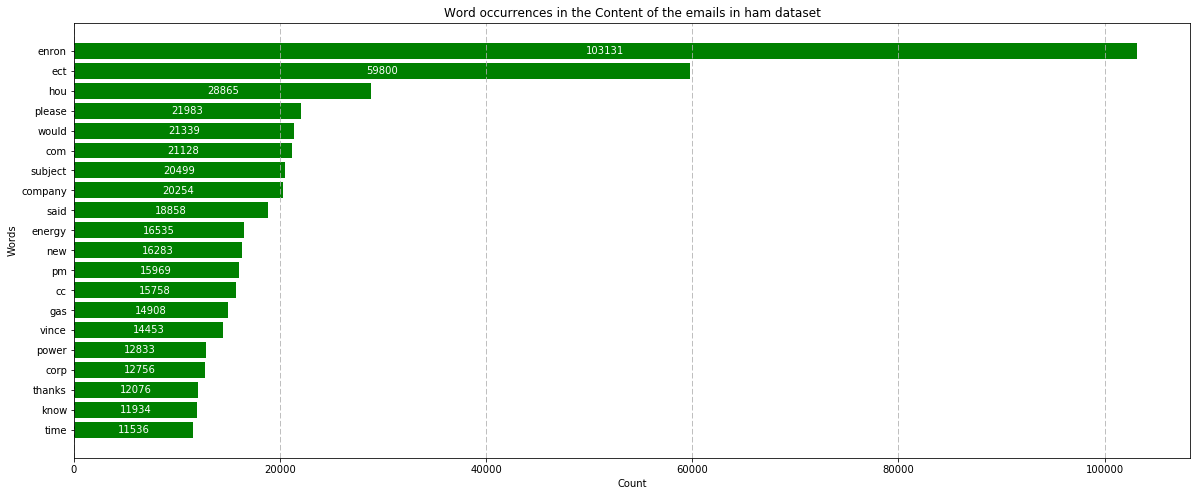

In [8]:
# Plot the occurrences
def get_plot_most_used_words(df, dataset, criteria):
    top_words_occurrences = df['Occurrences'].head(20).dropna()
    occurrences_index = range(len(top_words_occurrences))
    fig, ax = plt.subplots(figsize=(20, 8))
    # Tiny formatting: bars in green if we know it's ham, red if we know it's spam, blue otherwise
    plt.barh(occurrences_index, top_words_occurrences, align='center', 
             color='g' if dataset == HAM else 'r' if dataset == SPAM else 'b')
    plt.title("Word occurrences in the "+criteria+" of the emails in "+dataset+" dataset")
    plt.xlabel('Count')
    plt.ylabel(WORDS)
    ax.set_yticks(occurrences_index)
    ax.set_yticklabels(df['Word'].head(20).dropna())
    # Write the exact number of occurrences on each bar
    for occurrences_tick, values in enumerate(top_words_occurrences):
        ax.text(values/2, occurrences_tick+0.15, str(values), horizontalalignment='center', color='white')
    plt.gca().invert_yaxis()
    ax.xaxis.grid(True, linestyle='--')
    
    return plt

# Plot it for ham and content of the email
ham_top_text_plot = get_plot_most_used_words(ham_top_text, HAM, CONTENT)
ham_top_text_plot.show()

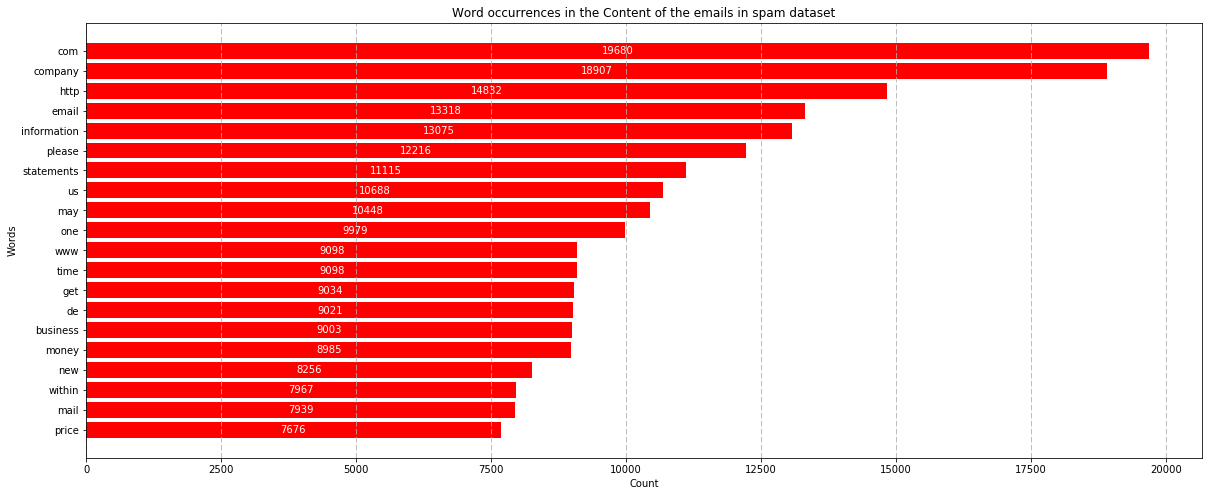

In [9]:
# Plot it for spam and content of the email
spam_top_text_plot = get_plot_most_used_words(spam_top_text, SPAM, CONTENT)
spam_top_text_plot.show()

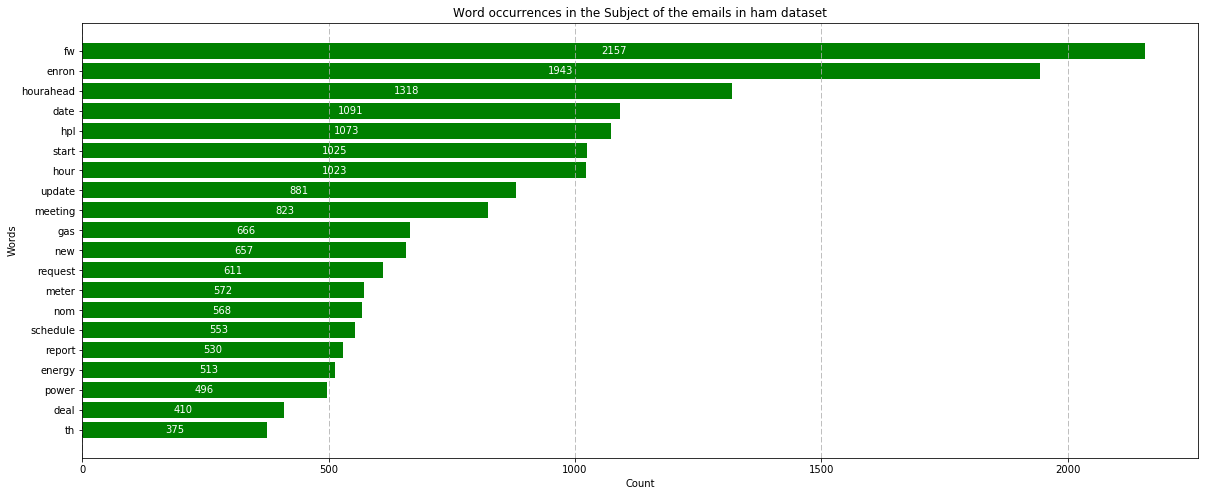

In [10]:
# Plot it for ham and subject of the email
ham_top_subject_plot = get_plot_most_used_words(ham_top_subject, HAM, SUBJECT)
ham_top_subject_plot.show()

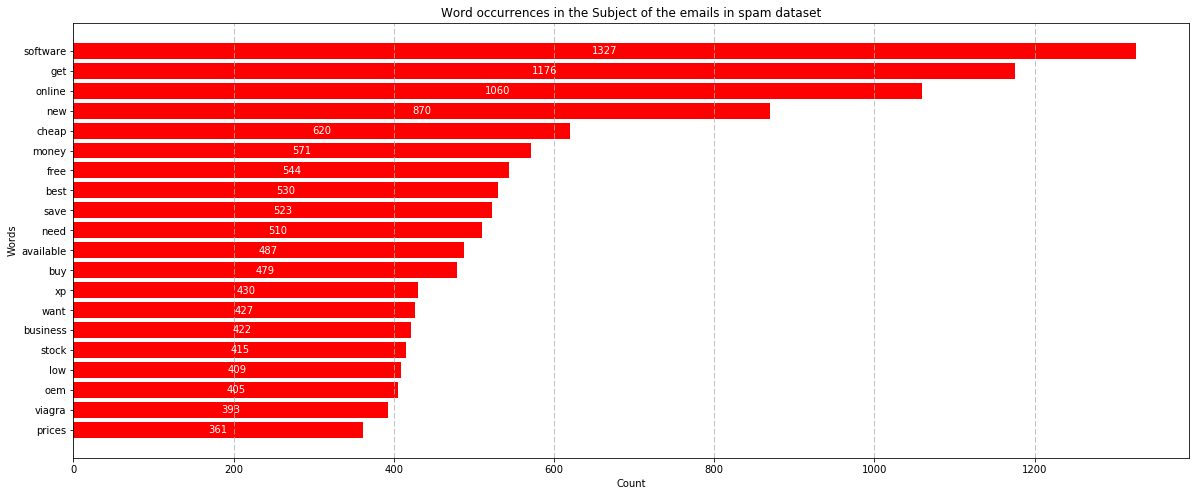

In [11]:
# Plot it for spam and subject of the email
spam_top_subject_plot = get_plot_most_used_words(spam_top_subject, SPAM, SUBJECT)
spam_top_subject_plot.show()

# Compare email lengths

In [12]:
# Create a class with the number of lines, of words and characters
class FileAttributes:
    def __init__(self, lines_arg, words_arg, chars_arg):
        self.lines = lines_arg
        self.words = words_arg
        self.chars = chars_arg


# Get the number of lines, words and characters
def get_lines_words_chars(opened_file):
    num_lines = 0
    num_words = 0
    num_chars = 0
    for line in opened_file:
        words = line.split()
        num_lines += 1
        num_words += len(words)
        num_chars += len(line)

    # Return the file attributes in the object
    return FileAttributes(num_lines, num_words, num_chars)


def count_attributes(csv_file):
    rows_count = []
    index_count = []
    with open(csv_file, 'r') as data_list:
        # Open the csv data file
        reader_list = csv.reader(data_list)
        # Skip the headers
        next(reader_list, None)
        # Each row is a path for a file so we use the function created earlier on to get the text
        for row in reader_list:
            file_name = row[0]
            ham_or_spam = row[1]
            # And we store it in a array
            file_attributes = get_lines_words_chars(open(file_name, encoding="latin-1"))
            rows_count.append({CLASS: ham_or_spam,
                               LINES: file_attributes.lines,
                               WORDS: file_attributes.words,
                               CHARS: file_attributes.chars})
            index_count.append(file_name)

    # Then create a data frame with the content, subject and merge of all emails in the set
    email_size = pd.DataFrame(rows_count, index=index_count)
    all_emails_size = pd.DataFrame({CLASS: [],
                                    LINES: [],
                                    WORDS: [],
                                    CHARS: []})
    all_emails_size = all_emails_size.append(email_size)
    # For some unknown reason, the data set doesn't display in the correct order so re-order the columns
    all_emails_size = all_emails_size[all_emails_size.columns.tolist()[1:] + all_emails_size.columns.tolist()[:1]]

    return all_emails_size

# Try this on the whole train set
all_attributes = count_attributes('train.csv')
all_attributes.head()

,Class,Lines,Words,Chars
Data\enron3\ham\2588.2001-09-18.kitchen.ham.txt,ham,10.0,225.0,1074.0
Data\enron2\ham\4607.2001-03-05.kaminski.ham.txt,ham,13.0,139.0,507.0
Data\enron3\ham\2829.2001-10-01.kitchen.ham.txt,ham,3.0,56.0,299.0
Data\enron2\ham\4447.2001-02-12.kaminski.ham.txt,ham,29.0,255.0,1168.0
Data\enron1\ham\1873.2000-08-07.farmer.ham.txt,ham,2.0,16.0,81.0


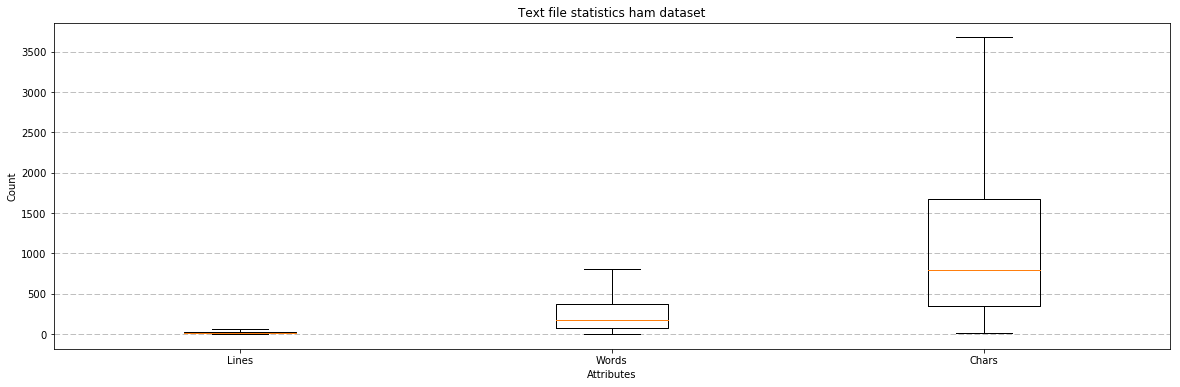

In [13]:
# Plot the results in box plots
def get_plot_file_attributes(attributes, dataset):
    ham_or_spam_attributes = attributes[all_attributes[CLASS] == dataset]
    attributes = [ham_or_spam_attributes[LINES].dropna(), 
                  ham_or_spam_attributes[WORDS].dropna(),
                  ham_or_spam_attributes[CHARS].dropna()]
    _, ax = plt.subplots(figsize=(20, 6))
    plt.boxplot(attributes, 0, '')
    plt.title("Text file statistics " + dataset + " dataset")
    plt.xlabel('Attributes')
    plt.ylabel('Count')
    plt.xticks([1, 2, 3], [LINES, WORDS, CHARS])
    ax.yaxis.grid(True, linestyle='--')
    
    return plt

# Show it on the ham set
ham_attributes = get_plot_file_attributes(all_attributes, HAM)
ham_attributes.show()

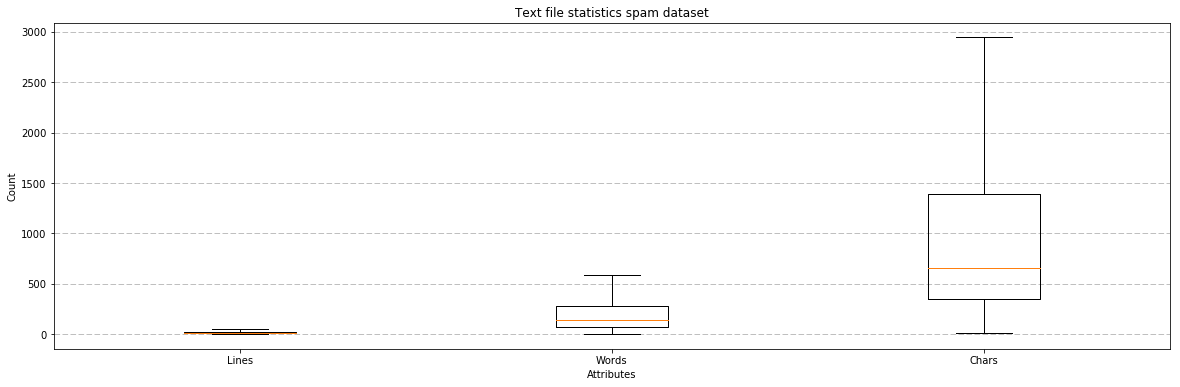

In [14]:
# Show it on the spam set
spam_attributes = get_plot_file_attributes(all_attributes, SPAM)
spam_attributes.show()

# Compare statistics on email lengths

In [15]:
# Get the statistics displayed in the box plots
def get_stats_files_attributes(attributes, dataset):
    ham_or_spam_attributes = attributes[all_attributes[CLASS] == dataset]
    stats = pd.DataFrame({'number of lines': ham_or_spam_attributes[LINES].describe(), 
                          'number of words': ham_or_spam_attributes[WORDS].describe(), 
                          'number of characters': ham_or_spam_attributes[CHARS].describe()})
    stats = stats[stats.columns.tolist()[1:] + stats.columns.tolist()[:1]]
    stats = stats.drop(stats.index[0])

    return stats

ham_stats = get_stats_files_attributes(all_attributes, HAM)
ham_stats.head(7)

,number of lines,number of words,number of characters
mean,26.721268,367.609101,1740.377342
std,54.070740,1210.980430,6090.865049
min,1.000000,2.000000,17.000000
25%,7.000000,73.000000,346.000000
50%,14.000000,175.000000,800.000000
75%,30.000000,368.000000,1680.000000
max,1769.000000,45451.000000,228377.000000


In [16]:
spam_stats = get_stats_files_attributes(all_attributes, SPAM)
spam_stats.head(7)

,number of lines,number of words,number of characters
mean,23.241368,263.063316,1325.064897
std,42.017576,390.165374,1966.493883
min,1.000000,1.000000,10.000000
25%,7.000000,71.000000,351.000000
50%,13.000000,137.000000,656.000000
75%,23.000000,278.000000,1389.000000
max,2647.000000,8402.000000,28761.000000


In [17]:
def color_cells(val):
    color = 'red' if val < 0 else 'green'

    return 'color: %s' % color

# Compare the the values in the two tables (nice display)
difference_stats = ham_stats-spam_stats
difference_stats.style.applymap(color_cells)